In [1]:


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import mdshare
import pyemma
import pandas as pd
from pyemma.util.contexts import settings



/home/dhiman/miniconda3/envs/pyemma/lib/python3.7/site-packages/mdshare/repository.py:53: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = load(fh)
/home/dhiman/miniconda3/envs/pyemma/lib/python3.7/site-packages/pyemma/util/log.py:64: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  D = yaml.load(f2)
/home/dhiman/miniconda3/envs/pyemma/lib/python3.7/site-packages/pyemma/__init__.py:92: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.5.
  .format(latest=latest, current=current), category=UserWarning)


In [2]:
pdb = 'spike_dry.pdb'
files = []
files += ['6vxx/combined_no_water_40ns/MSM_%i_dry.dcd'%d for d in range(1,3)]
files += ['6vxx/closed_80ns_US_3.dcd']
files += ['6vxx/combined_no_water_40ns/MSM_%i_dry.dcd'%d for d in range(4,11)]
files += ['6vxx/combined_no_water_40ns/MSM_%i_dry.dcd'%d for d in range(22,31)]
files += ['6vxx/fully_open_80ns_US_33.dcd']
files += ['6vsb/combined_no_water_40ns/MSM_%i_dry.dcd'%d for d in range(16,20)]
files += ['6vsb/combined_no_water_40ns/MSM_%i_dry.dcd'%d for d in range(21,32)]
files += ['6vsb/partially_open_80ns_6vsb_32.dcd']
files += ['6vsb/combined_no_water_40ns/MSM_%i_dry.dcd'%d for d in range(33,35)]
#files = files1 + files2 + files3 + files4

#replace 40 ns ones with 80 ns
print(files)

['6vxx/combined_no_water_40ns/MSM_1_dry.dcd', '6vxx/combined_no_water_40ns/MSM_2_dry.dcd', '6vxx/closed_80ns_US_3.dcd', '6vxx/combined_no_water_40ns/MSM_4_dry.dcd', '6vxx/combined_no_water_40ns/MSM_5_dry.dcd', '6vxx/combined_no_water_40ns/MSM_6_dry.dcd', '6vxx/combined_no_water_40ns/MSM_7_dry.dcd', '6vxx/combined_no_water_40ns/MSM_8_dry.dcd', '6vxx/combined_no_water_40ns/MSM_9_dry.dcd', '6vxx/combined_no_water_40ns/MSM_10_dry.dcd', '6vxx/combined_no_water_40ns/MSM_22_dry.dcd', '6vxx/combined_no_water_40ns/MSM_23_dry.dcd', '6vxx/combined_no_water_40ns/MSM_24_dry.dcd', '6vxx/combined_no_water_40ns/MSM_25_dry.dcd', '6vxx/combined_no_water_40ns/MSM_26_dry.dcd', '6vxx/combined_no_water_40ns/MSM_27_dry.dcd', '6vxx/combined_no_water_40ns/MSM_28_dry.dcd', '6vxx/combined_no_water_40ns/MSM_29_dry.dcd', '6vxx/combined_no_water_40ns/MSM_30_dry.dcd', '6vxx/fully_open_80ns_US_33.dcd', '6vsb/combined_no_water_40ns/MSM_16_dry.dcd', '6vsb/combined_no_water_40ns/MSM_17_dry.dcd', '6vsb/combined_no_water_

In [28]:
for i in range(len(files)):
    print(i, files[i])

0 6vxx/combined_no_water_40ns/MSM_1_dry.dcd
1 6vxx/combined_no_water_40ns/MSM_2_dry.dcd
2 6vxx/closed_80ns_US_3.dcd
3 6vxx/combined_no_water_40ns/MSM_4_dry.dcd
4 6vxx/combined_no_water_40ns/MSM_5_dry.dcd
5 6vxx/combined_no_water_40ns/MSM_6_dry.dcd
6 6vxx/combined_no_water_40ns/MSM_7_dry.dcd
7 6vxx/combined_no_water_40ns/MSM_8_dry.dcd
8 6vxx/combined_no_water_40ns/MSM_9_dry.dcd
9 6vxx/combined_no_water_40ns/MSM_10_dry.dcd
10 6vxx/combined_no_water_40ns/MSM_22_dry.dcd
11 6vxx/combined_no_water_40ns/MSM_23_dry.dcd
12 6vxx/combined_no_water_40ns/MSM_24_dry.dcd
13 6vxx/combined_no_water_40ns/MSM_25_dry.dcd
14 6vxx/combined_no_water_40ns/MSM_26_dry.dcd
15 6vxx/combined_no_water_40ns/MSM_27_dry.dcd
16 6vxx/combined_no_water_40ns/MSM_28_dry.dcd
17 6vxx/combined_no_water_40ns/MSM_29_dry.dcd
18 6vxx/combined_no_water_40ns/MSM_30_dry.dcd
19 6vxx/fully_open_80ns_US_33.dcd
20 6vsb/combined_no_water_40ns/MSM_16_dry.dcd
21 6vsb/combined_no_water_40ns/MSM_17_dry.dcd
22 6vsb/combined_no_water_40ns/MSM_

In [3]:
feat = pyemma.coordinates.featurizer(pdb)
contact = np.loadtxt('contacts.txt')
contact = contact.astype(int)

feat.add_distances(contact)

data = pyemma.coordinates.source(files, features=feat, stride=1)

In [20]:
print('type of data:', type(data))


type of data: <class 'pyemma.coordinates.data.feature_reader.FeatureReader'>


In [4]:

print(feat.describe())



['DIST: LYS 557 CA 8720 - ASN 282 CA 22161', 'DIST: LYS 558 CA 8742 - ASN 282 CA 22161', 'DIST: PHE 559 CA 8764 - GLY 283 CA 22174', 'DIST: PHE 559 CA 8764 - PHE 43 CA 18352', 'DIST: PHE 562 CA 8817 - PRO 225 CA 21268', 'DIST: PHE 562 CA 8817 - LYS 41 CA 18314', 'DIST: GLN 563 CA 8837 - LYS 41 CA 18314', 'DIST: GLN 563 CA 8837 - VAL 42 CA 18336', 'DIST: LEU 560 CA 8784 - PHE 43 CA 18352', 'DIST: GLN 563 CA 8837 - PHE 43 CA 18352', 'DIST: ARG 646 CA 10068 - PRO 862 CA 30990', 'DIST: VAL 615 CA 9599 - LYS 835 CA 30580', 'DIST: ASN 616 CA 9615 - LYS 835 CA 30580', 'DIST: VAL 615 CA 9599 - TYR 837 CA 30619', 'DIST: ASN 616 CA 9615 - TYR 837 CA 30619', 'DIST: VAL 615 CA 9599 - GLN 836 CA 30602', 'DIST: SER 591 CA 9263 - TYR 837 CA 30619', 'DIST: PRO 589 CA 9241 - PHE 855 CA 30879', 'DIST: THR 588 CA 9225 - ASP 839 CA 30647', 'DIST: LEU 546 CA 8570 - ASP 979 CA 32733', 'DIST: GLY 545 CA 8563 - SER 982 CA 32783', 'DIST: GLY 566 CA 8891 - PHE 43 CA 18352', 'DIST: GLY 566 CA 8891 - ARG 44 CA 18

In [5]:
tica = pyemma.coordinates.tica(data, lag=1)
tica_output = tica.get_output()



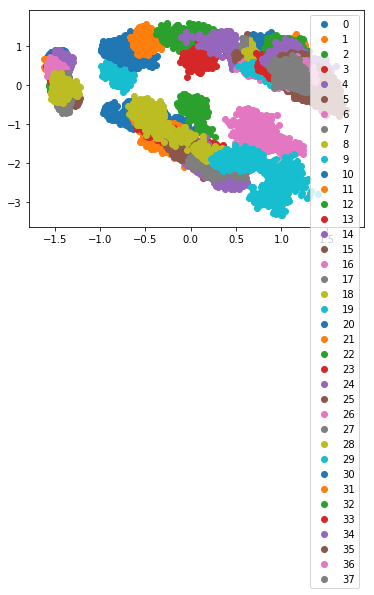

In [7]:
for i in range(38):
    plt.scatter(tica_output[i].T[0],tica_output[i].T[1],label='%d'%i)
plt.legend()


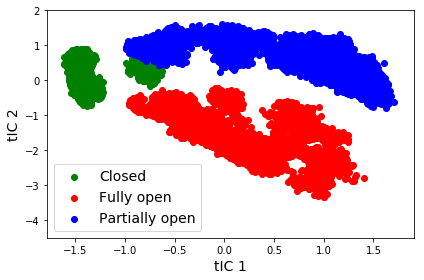

In [30]:
plt.scatter(tica_output[0].T[0],tica_output[0].T[1],color='g',label='Closed')
for i in range(1,10):
    plt.scatter(tica_output[i].T[0],tica_output[i].T[1],color='g')
#plt.legend()
plt.scatter(tica_output[10].T[0],tica_output[10].T[1],color='r',label='Fully open')
for i in range(11,20):
    plt.scatter(tica_output[i].T[0],tica_output[i].T[1],color='r')
#plt.legend()
plt.scatter(tica_output[20].T[0],tica_output[20].T[1],color='b',label='Partially open')
for i in range(21,38):
    plt.scatter(tica_output[i].T[0],tica_output[i].T[1],color='b')
#plt.scatter(tica_output[19].T[0],tica_output[19].T[1],color='y')
plt.legend(fontsize=14)
plt.ylim(-4.5,2)
plt.xlabel('tIC 1',fontsize=14)
plt.ylabel('tIC 2',fontsize=14)
plt.tight_layout()
#plt.savefig('tica-distribution.pdf')

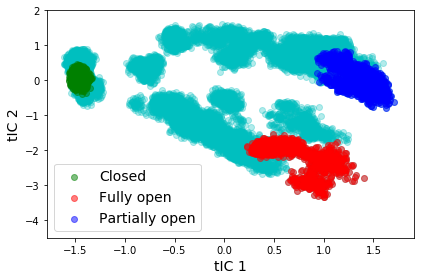

In [53]:

l = [i for i in range(38)]
l.pop(2)
l.pop(19)
l.pop(35)
#print(l)

for i in l:
    plt.scatter(tica_output[i].T[0],tica_output[i].T[1],color='c',alpha=0.3)
    
plt.scatter(tica_output[2].T[0],tica_output[2].T[1],color='g',alpha=0.5,label='Closed')
plt.scatter(tica_output[19].T[0],tica_output[19].T[1],color='r',alpha=0.5,label='Fully open')
plt.scatter(tica_output[35].T[0],tica_output[35].T[1],color='b',alpha=0.5,label='Partially open')




plt.legend(fontsize=14)
plt.ylim(-4.5,2)
plt.xlabel('tIC 1',fontsize=14)
plt.ylabel('tIC 2',fontsize=14)
plt.tight_layout()
plt.savefig('tica-distribution.pdf')

In [36]:
for i in range(38):
    f1 = open('tica-data/tic_traj_%d'%i,'w')
    print('#tIC 1     #tIC 2',file=f1)
    a = tica_output[i].T[0]
    b = tica_output[i].T[1]
    for j in range(len(tica_output[i].T[0])):
        print(a[j],b[j],file=f1)
    f1.close()

In [9]:
pca = pyemma.coordinates.pca(data, lag=1)
pca_output = pca.get_output()

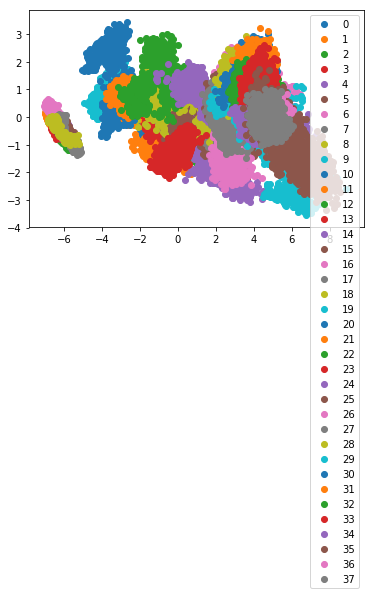

In [10]:
for i in range(38):
    plt.scatter(pca_output[i].T[0],pca_output[i].T[1],label='%d'%i)
plt.legend()

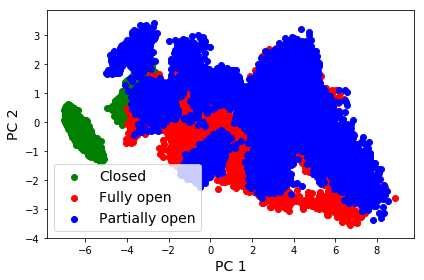

In [31]:
plt.scatter(pca_output[0].T[0],pca_output[0].T[1],color='g',label='Closed')
for i in range(1,10):
    plt.scatter(pca_output[i].T[0],pca_output[i].T[1],color='g')
#plt.legend()
plt.scatter(pca_output[10].T[0],pca_output[10].T[1],color='r',label='Fully open')
for i in range(11,20):
    plt.scatter(pca_output[i].T[0],pca_output[i].T[1],color='r')
#plt.legend()
plt.scatter(pca_output[20].T[0],pca_output[20].T[1],color='b',label='Partially open')
for i in range(21,38):
    plt.scatter(pca_output[i].T[0],pca_output[i].T[1],color='b')
plt.legend(fontsize=14)
#plt.ylim(-4.5,2)
plt.xlabel('PC 1',fontsize=14)
plt.ylabel('PC 2',fontsize=14)
plt.tight_layout()

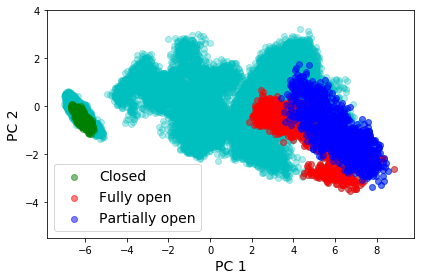

In [56]:
l = [i for i in range(38)]
l.pop(2)
l.pop(19)
l.pop(35)
#print(l)

for i in l:
    plt.scatter(pca_output[i].T[0],pca_output[i].T[1],color='c',alpha=0.3)

plt.scatter(pca_output[2].T[0],pca_output[2].T[1],color='g',alpha=0.5,label='Closed')
plt.scatter(pca_output[19].T[0],pca_output[19].T[1],color='r',alpha=0.5,label='Fully open')
plt.scatter(pca_output[35].T[0],pca_output[35].T[1],color='b',alpha=0.5,label='Partially open')
plt.legend(fontsize=14)
plt.ylim(-5.5,4)
plt.xlabel('PC 1',fontsize=14)
plt.ylabel('PC 2',fontsize=14)
plt.tight_layout()
plt.savefig('pca-distribution.pdf')

In [37]:

for i in range(38):
    f1 = open('pca-data/pc_traj_%d'%i,'w')
    print('#PC 1     #PC 2',file=f1)
    a = tica_output[i].T[0]
    b = tica_output[i].T[1]
    for j in range(len(tica_output[i].T[0])):
        print(a[j],b[j],file=f1)
    f1.close()
    

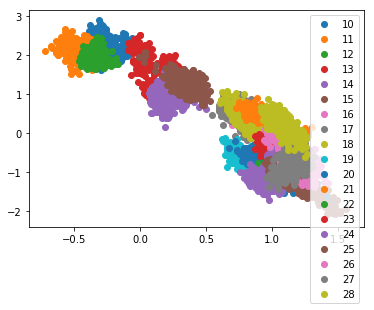

In [50]:
for i in range(10,29):
    plt.scatter(tica_output[i].T[0],tica_output[i].T[1],label='%d'%i)
plt.legend()
#len(tica_output[1][1])
#len(tica_output[1].T[1])

400
368
400
400
400
400
400
400
400
400
338
326
338
305
337
372
304
360
368
379
366
380
400
367
361
363
352
352
333
366
400
359
400
400


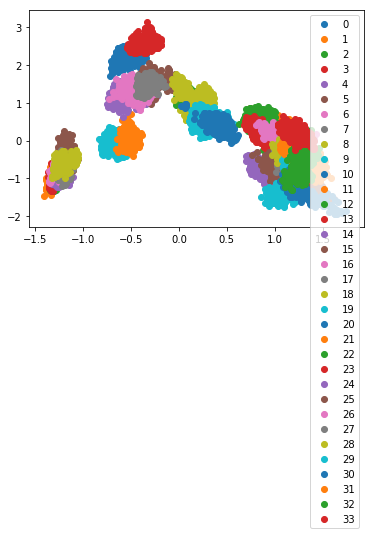

In [53]:
for i in range(0,34):
    plt.scatter(tica_output[i].T[0],tica_output[i].T[1],label='%d'%i)
    print(len(tica_output[i].T[0]))
plt.legend()

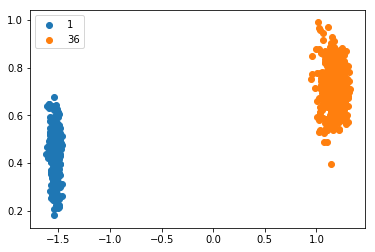

In [23]:
plt.scatter(tica_output[1].T[0],tica_output[1].T[1],label='1')
plt.scatter(tica_output[31].T[0],tica_output[31].T[1],label='36')
plt.legend()

In [15]:
tica_concatenated = np.concatenate(tica_output)

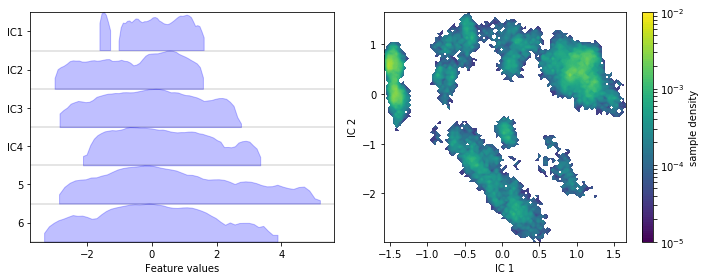

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated[:, :6],
    ax=axes[0],
    feature_labels=['IC1', 'IC2', 'IC3', 'IC4','5','6'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*tica_concatenated[:, 0:2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
#plt.savefig('us-tica-dihedral-dist.pdf')

In [55]:
n_clustercenters = [60, 80, 100, 200, 400]

scores = np.zeros((len(n_clustercenters), 10))
for n, k in enumerate(n_clustercenters):
    for m in range(10):
        with pyemma.util.contexts.settings(show_progress_bars=False):
            _cl = pyemma.coordinates.cluster_kmeans(
                tica_output, k=k, max_iter=50, stride=1)
            _msm = pyemma.msm.estimate_markov_model(_cl.dtrajs, 100)
            scores[n, m] = _msm.score_cv(
                _cl.dtrajs, n=1, score_method='VAMP2', score_k=min(10, k))

fig, ax = plt.subplots()
lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
ax.plot(n_clustercenters, np.mean(scores, axis=1), '-o')
ax.semilogx()
ax.set_xlabel('number of cluster centers')
ax.set_ylabel('VAMP-2 score')
fig.tight_layout()

17-09-20 00:41:09 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[329] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 2
17-09-20 00:41:11 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[333] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 2


ZeroRankError: All eigenvalues are smaller than 1e-10, rank reduction would discard all dimensions.

In [95]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_output, k=800, max_iter=100, stride=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

/home/dhiman/miniconda3/envs/pyemma/lib/python3.7/site-packages/msmtools/analysis/dense/decomposition.py:545: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


17-09-20 01:07:33 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[366] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


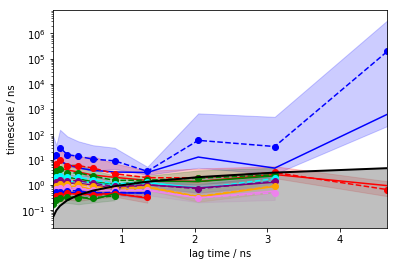

In [96]:
its = pyemma.msm.its(cluster.dtrajs, lags=100, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.05, ylog=True)
#plt.savefig('Implied-timescales.pdf')

In [97]:
msm = pyemma.msm.estimate_markov_model(cluster.dtrajs, lag=10, dt_traj='0.05 ns')


In [98]:
nstates = 5
cktest = msm.cktest(nstates, mlags=3)
pyemma.plots.plot_cktest(cktest, dt=0.05, units='ns')

IndexError: index 695 is out of bounds for axis 1 with size 694

In [99]:
msm.pi

array([1.87437125e-06, 7.21112595e-04, 1.82786755e-10, 4.24262771e-08,
       8.62379911e-01, 6.49001464e-03, 2.45238880e-09, 4.17381937e-04,
       2.89188706e-05, 1.90827582e-02, 1.10877425e-01, 5.50410599e-07,
       7.98282859e-09])

In [93]:
dtrajs_concatenated = np.concatenate(cluster.dtrajs)
dtrajs_concatenated

array([354, 354, 354, ...,  34,  34,  34], dtype=int32)

In [57]:
cluster.dtrajs

[array([ 74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,
         74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,
         74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,
         74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,
         74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,
         74,  74,  74,  74,  89,  74,  89,  74,  89,  74,  74,  74,  74,
         74,  74,  74,  74,  89,  74,  74,  74,  74,  74,  89,  74,  89,
         89,  89,  89,  89,  89,  89,  89,  89,  89,  89,  89,  89,  89,
         89,  89,  89,  89,  89,  89,  89,  89,  89,  89,  89,  89,  89,
         89,  89,  89,  89,  89,  89,  89,  89, 138,  89,  89,  89, 138,
        138, 138, 138, 138,  89, 138,  89,  89, 138, 138,  89, 138, 138,
        138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138,
        138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138,
        138, 138, 138, 138, 138, 138, 138, 138, 138

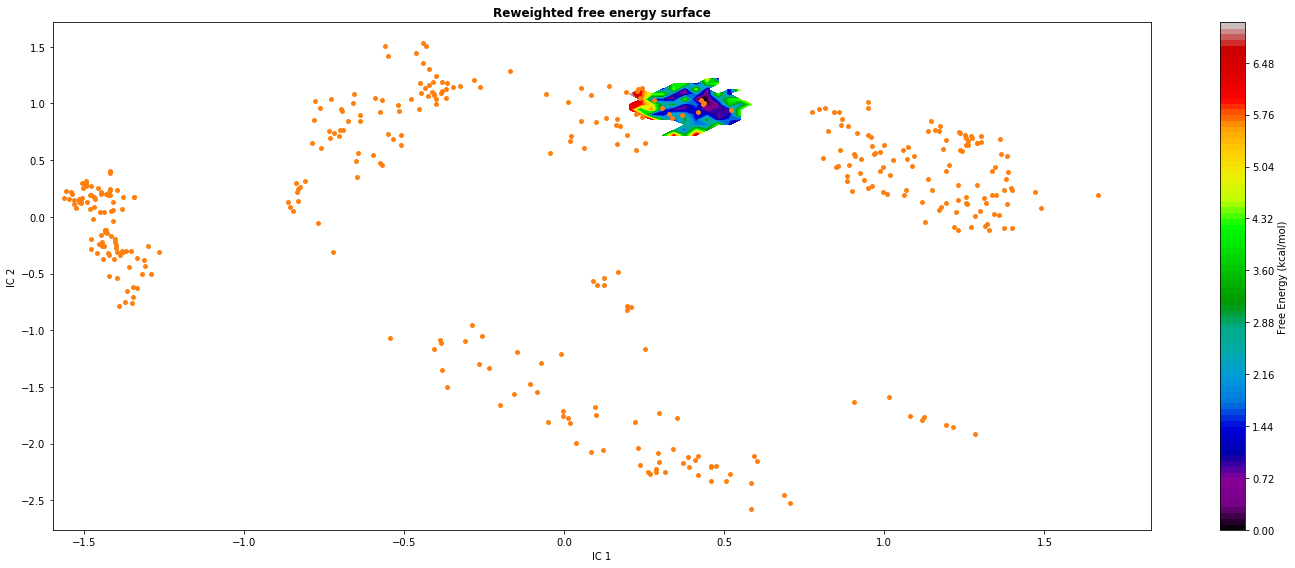

In [94]:
fig, axes = plt.subplots(1, 1, figsize=(20, 8), sharex=True, sharey=True)
#pyemma.plots.plot_contour(
#*tica_concatenated[:, :2].T,
#    msm.pi[dtrajs_concatenated],
#    ax=axes[0],
#    mask=True,
#    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes,
    legacy=False, kT=0.6, cbar_label='Free Energy (kcal/mol)')
ax = axes
ax.set_xlabel('IC 1')
axes.set_ylabel('IC 2')
axes.set_title('Stationary distribution', fontweight='bold')
axes.set_title('Reweighted free energy surface', fontweight='bold')
axes.scatter(*cluster.clustercenters[:,:2].T, s = 15, c='C1')
fig.tight_layout()

In [78]:
print(len(tica.feature_TIC_correlation[:,0]))
print(len(feat.describe()))

173
173


In [79]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
#string = feat.describe()
#residue = [int(s) for s in string.split() if s.isdigit()]
a = pd.Series(tica.feature_TIC_correlation[:,0], index=feat.describe())
b = a.sort_values()
print(b)

DIST: GLN 564 CA 8854 - LYS 41 CA 18314     -0.717437
DIST: PHE 565 CA 8871 - LYS 41 CA 18314     -0.692205
DIST: PHE 565 CA 8871 - VAL 42 CA 18336     -0.606604
DIST: GLN 564 CA 8854 - VAL 42 CA 18336     -0.572296
DIST: GLN 563 CA 8837 - LYS 41 CA 18314     -0.556793
DIST: ILE 569 CA 8934 - ALA 852 CA 30830    -0.544456
DIST: LEU 560 CA 8784 - PHE 43 CA 18352     -0.440310
DIST: PHE 562 CA 8817 - PRO 225 CA 21268    -0.401233
DIST: ASP 568 CA 8922 - ARG 847 CA 30746    -0.377458
DIST: THR 315 CA 4982 - PRO 295 CA 4662     -0.343755
DIST: GLN 564 CA 8854 - PHE 43 CA 18352     -0.336991
DIST: SER 305 CA 4820 - LEU 48 CA 765       -0.334999
DIST: PHE 559 CA 8764 - PHE 43 CA 18352     -0.314537
DIST: GLN 563 CA 8837 - PHE 43 CA 18352     -0.313246
DIST: ALA 647 CA 10092 - PRO 862 CA 30990   -0.244181
DIST: LYS 304 CA 4798 - SER 50 CA 801       -0.240406
DIST: ASP 568 CA 8922 - ARG 44 CA 18372     -0.237374
DIST: ALA 570 CA 8953 - ALA 852 CA 30830    -0.236032
DIST: GLY 700 CA 10854 - LYS

In [1]:
print(a)

NameError: name 'a' is not defined

Text(0, 0.5, 'Correlation with IC 1')

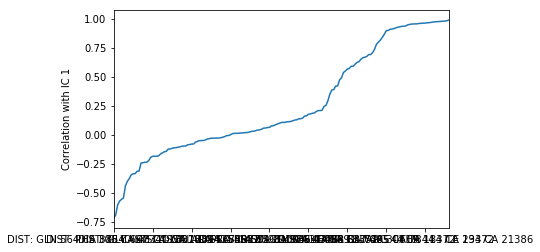

In [80]:
b.plot.line()
plt.xlabel("")
plt.ylabel('Correlation with IC 1')
#plt.savefig('tica-correlation-sorted.pdf')

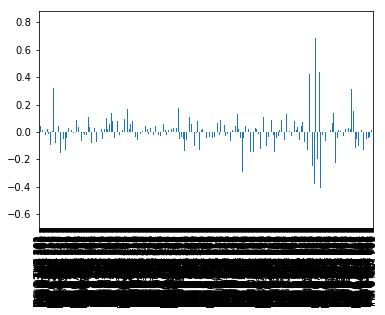

In [14]:
a.plot.bar()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

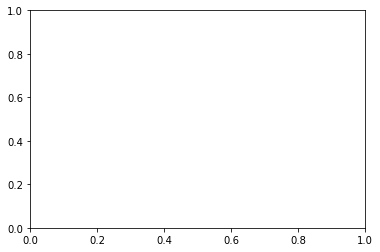

In [14]:
xx = np.arange(300,700,0.5)
plt.bar(xx,a.array)
plt.xlabel('Residue')
plt.ylabel('Correlation with IC 1')
#plt.savefig('tica-correlation-residue-dihedral.pdf')


Text(0, 0.5, 'Correlation with IC 2')

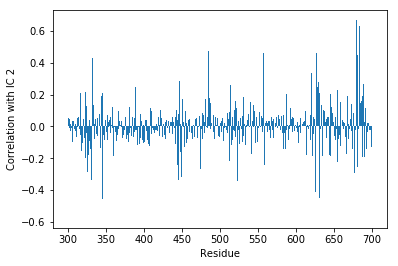

In [15]:
c = pd.Series(tica.feature_TIC_correlation[:,1], index=feat.describe())
#c.plot.line()
plt.bar(xx,c.array)
plt.xlabel('Residue')
plt.ylabel('Correlation with IC 2')
#plt.savefig('tica-correlation-residue-dihedral-2.pdf')

In [18]:
b.to_csv('TICA-correlation.csv')

/home/dhiman/miniconda3/envs/pyemma/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


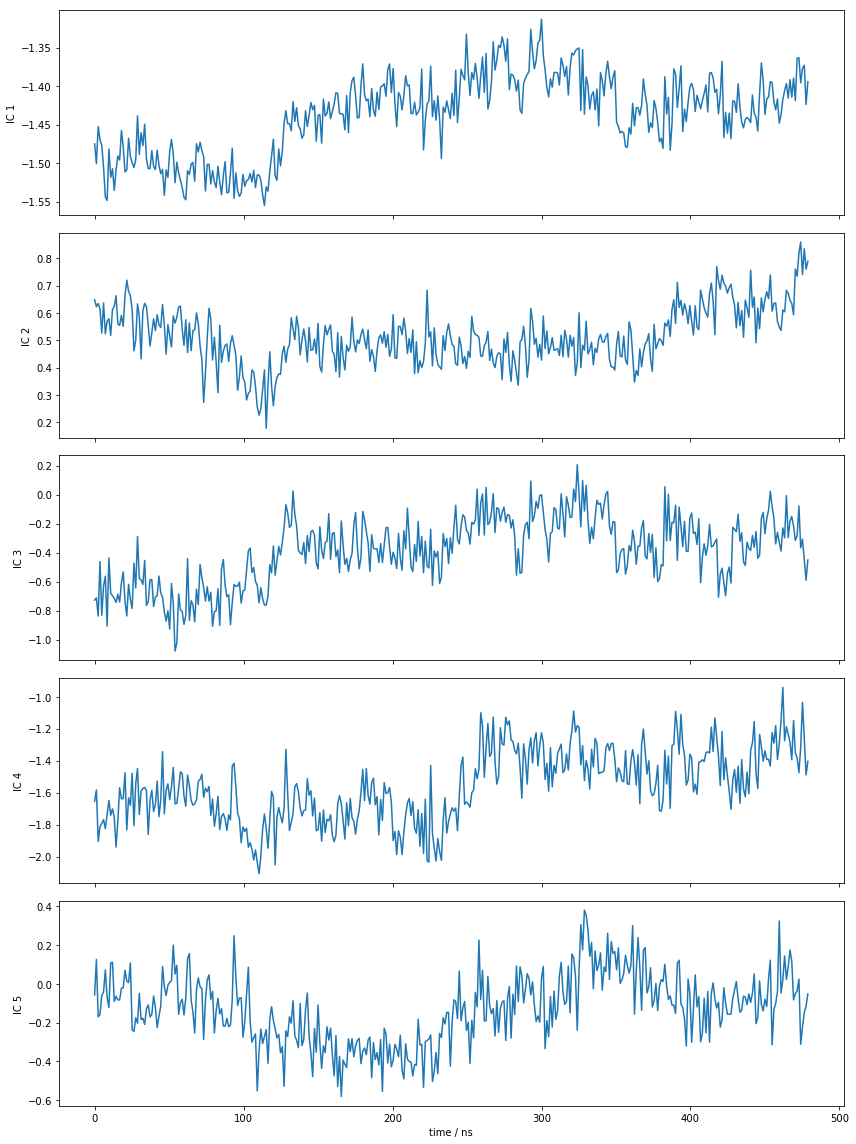

In [33]:
fig, axes = plt.subplots(5, 1, figsize=(12,16), sharex=True)
x = 1.2 * np.arange(tica_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / ns')
fig.tight_layout()

Text(0.5, 1.0, 'DNA')

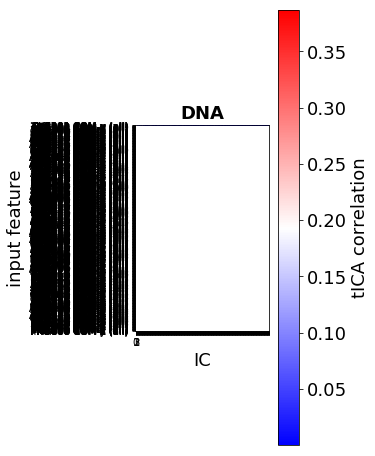

In [15]:
fig, ax = plt.subplots(figsize=(3, 8))
i = ax.imshow(abs(tica.feature_TIC_correlation[:4]), cmap='bwr')

ax.set_xticks(range(tica.dimension()))
ax.set_xticklabels(range(4)) #1,tica.dimension()+1))
ax.set_xlabel('IC',fontsize=18)

ax.set_yticks(range(feat.dimension()))
ax.set_yticklabels(feat.describe())
ax.set_ylabel('input feature',fontsize=18)

cbar=fig.colorbar(i);
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_ylabel('tICA correlation',fontsize=18)
plt.title('DNA',fontsize=18,fontweight='bold')